In [2]:
from pymongo import MongoClient
import os
client = MongoClient(os.environ.get("SELECTED_TESTS_MONGO_URI"))

db = client.selected_tests
pipeline = [{"$lookup": {"from": "task_mappings_tasks", "localField": "_id",  "foreignField": "task_mapping_id", "as": "tasks" }}, {"$unwind": "$tasks"}, {"$addFields": {"threshold": {"$divide": ["$tasks.flip_count", "$source_file_seen_count"]}}}]

task_mappings = db.task_mappings.aggregate(pipeline)
thresholds = []
for mapping in task_mappings:
    thresholds.append(mapping["threshold"])

print(len(thresholds))

104128


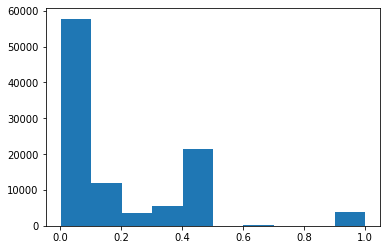

In [4]:
from matplotlib import pyplot
pyplot.hist(thresholds)
pyplot.show()

In [ ]:
from scipy.stats import normaltest
import numpy as np
threshold_array = np.array(threshold)

stat, p = normaltest(threshold_array)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')